In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import keras

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
print("We have total", len(training_images), "images for training")
print("with", len(training_labels), "labels for each image")

We have total 60000 images for training
with 60000 labels for each image


In [6]:
print("We have taken", len(test_images), "images to test our model")
print("with", len(test_labels), "its labels for each image")

We have taken 10000 images to test our model
with 10000 its labels for each image


In [7]:
print('training_images: ' + str(training_images.shape))
print('training_labels: ' + str(training_labels.shape))
print('test_images:  '  + str(test_images.shape))
print('test_labels:  '  + str(test_labels.shape))

training_images: (60000, 28, 28)
training_labels: (60000,)
test_images:  (10000, 28, 28)
test_labels:  (10000,)


In [8]:
training_images=training_images.reshape(60000, 28, 28, 1)  # CNN takes i/p in 3*3 format
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

### CNN Model consisting of: 2-Hidden layers, 1 flatten and 2 dense layer(1 for i/p and 1 for o/p) along with elu and softplus AF

In [9]:
model = tf.keras.models.Sequential([# Convolution1
                                    tf.keras.layers.Conv2D(32, (3,3), activation='elu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Convolution2
                                    tf.keras.layers.Conv2D(64, (3,3), activation='elu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Flattening the o/p
                                    tf.keras.layers.Flatten(),
                                    # 128 dense layers, and 10 output layers
                                    tf.keras.layers.Dense(128, activation='elu'),
                                    tf.keras.layers.Dense(10, activation='softplus')
                                    ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Adadelta Optimizer with sparse categrical crossentropy loss function

In [11]:
model.compile(optimizer='Adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(training_images, training_labels, batch_size=256, epochs=20, validation_split=.15)

Epoch 1/20
200/200 [==============================] - 22s 110ms/step - loss: 2.2979 - accuracy: 0.1983 - val_loss: 2.2786 - val_accuracy: 0.2440
Epoch 2/20
200/200 [==============================] - 22s 112ms/step - loss: 2.2641 - accuracy: 0.2486 - val_loss: 2.2453 - val_accuracy: 0.2617
Epoch 3/20
200/200 [==============================] - 23s 114ms/step - loss: 2.2311 - accuracy: 0.2540 - val_loss: 2.2125 - val_accuracy: 0.2651
Epoch 4/20
200/200 [==============================] - 23s 115ms/step - loss: 2.1983 - accuracy: 0.2713 - val_loss: 2.1796 - val_accuracy: 0.3050
Epoch 5/20
200/200 [==============================] - 23s 116ms/step - loss: 2.1648 - accuracy: 0.3374 - val_loss: 2.1459 - val_accuracy: 0.3906
Epoch 6/20
200/200 [==============================] - 24s 118ms/step - loss: 2.1306 - accuracy: 0.4302 - val_loss: 2.1114 - val_accuracy: 0.4754
Epoch 7/20
200/200 [==============================] - 25s 123ms/step - loss: 2.0953 - accuracy: 0.5048 - val_loss: 2.0757 - val_ac

In [13]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3436371088027954
Test accuracy: 0.679099977016449


In [14]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

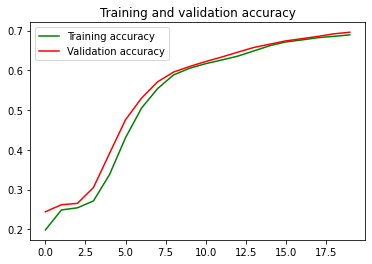

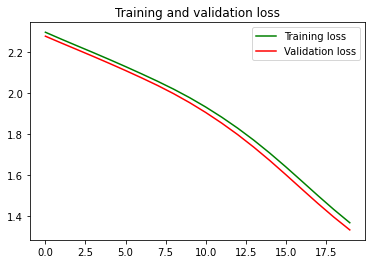

In [15]:
plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
predictions = model.predict(test_images)
print("Predicted Probabilities -\n",predictions[5])
pred_labels = np.argmax(predictions,axis=1)
print("\nPredicted Class [Highest Prob] -",pred_labels[:4])

Predicted Probabilities -
 [0.3227227  0.67042345 0.12664953 0.42515147 0.17233853 0.0343907
 0.22721493 0.02218077 0.05566427 0.04533965]

Predicted Class [Highest Prob] - [9 2 1 1]


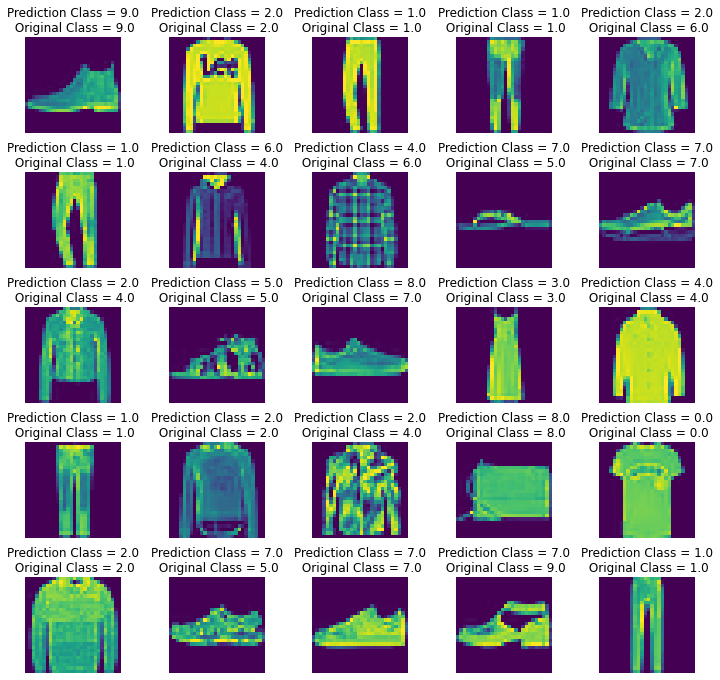

In [17]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(test_images[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {pred_labels[i]:0.1f}\n Original Class = {test_labels[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels) * 100

67.91